## Exercise: Minimum Spanning Tree

Ici, nous utilisons le concept de graphe pour **trouver un chemin qui parcourt tous les noeuds au moindre coût**. 

En effet, les liens peuvent avoir des poids qui sont souvent associés à des coûts. 

Le contexte du problème suivant est similaire au **"traveling salesman problem"**. Le but est de trouver quel est le meilleur itinéraire de voyage pour parcourir quelques villes en Alaska en pensant aux miles.






#### _Partie A_

Voici, un code pour créer un graphe avec le package NetworkX. Veuillez le parcourir et comprendre un peu la logique derrière. 

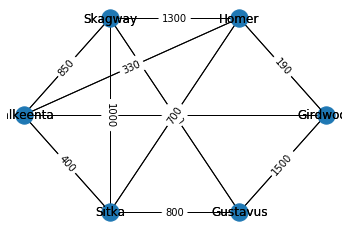

In [39]:
## Source: http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html

# Importer le package necessaire
import matplotlib.pyplot as plt
import networkx as nx

# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['Talkeenta', 'Skagway','Sitka' , 'Homer', 'Gustavus', 'Girdwood']
G.add_nodes_from(list_nodes)

# Ajouter les coordonnées de chaque noeud
G.nodes['Talkeenta']['pos'] = (0,0)
G.nodes['Skagway']['pos'] = (2,2)
G.nodes['Sitka']['pos'] = (2,-2)
G.nodes['Homer']['pos'] = (5,2)
G.nodes['Gustavus']['pos'] = (5,-2)
G.nodes['Girdwood']['pos'] = (7,0)

# Stocker les coordonnées dans un dictionnaire
node_pos=nx.get_node_attributes(G,'pos')

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('Talkeenta', 'Skagway', weight = 850)
G.add_edge('Skagway', 'Sitka', weight = 1000)
G.add_edge('Skagway', 'Homer', weight = 1300)
G.add_edge('Skagway', 'Gustavus', weight = 500)
G.add_edge('Homer', 'Girdwood', weight = 190)
G.add_edge('Homer', 'Talkeenta', weight = 330)
G.add_edge('Gustavus', 'Girdwood', weight = 1500)
G.add_edge('Sitka', 'Talkeenta', weight = 400)
G.add_edge('Sitka', 'Homer', weight = 700)
G.add_edge('Sitka', 'Gustavus', weight = 800)
G.add_edge('Talkeenta', 'Girdwood', weight = 850)

# Stocker les poids dans un dictionnaire
arc_weight=nx.get_edge_attributes(G,'weight')

# Dessiner les noeuds
nx.draw_networkx(G, node_pos)

# Dessiner les labels des noeuds
nx.draw_networkx_labels(G, node_pos)

# Dessiner les liens
nx.draw_networkx_edges(G, node_pos)

# Dessiner les labels des liens
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)

# enlever les axes
plt.axis('off')

# Montrer le graphe
plt.show()

#### _Partie B_

Veuillez trouver le chemin le moins coûteux pour parcourir toutes ces villes. Il est préférable de le faire sur papier.

Rentrez le nom des villes dans l'ordre de visite dans la liste `t` en commençant par Girdwood.

In [0]:
# t=[] 

#### _Partie C_

Voici, un petit code pour générer la solution en vitesse. Veuillez le parcourir et comprendre un peu la logique derrière. 



In [47]:
# Utiliser le NetworkX package pour determiner le Minimum Spanning Tree
T = nx.minimum_spanning_tree(G)

# Afficher les liens optimaux
print(T.edges())

[('Talkeenta', 'Homer'), ('Talkeenta', 'Sitka'), ('Skagway', 'Gustavus'), ('Sitka', 'Gustavus'), ('Homer', 'Girdwood')]


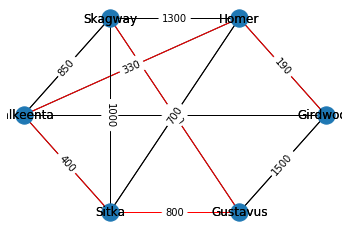

In [40]:
# Stocker les liens optimaux 
red_edges = T.edges()

# Si le lien est optimal, le mettre en rouge, sinon noir
edge_col = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

# Dessiner les noeuds
nx.draw_networkx(G, node_pos)

# Dessiner les labels des noeuds
nx.draw_networkx_labels(G, node_pos)

# Dessiner les liens
nx.draw_networkx_edges(G, node_pos,edge_color= edge_col)

# Dessiner les labels des liens
nx.draw_networkx_edge_labels(G, node_pos,edge_color= edge_col, edge_labels=arc_weight)

# Enlever les axes
plt.axis('off')

# Montrer le graphe
plt.show()


## Exercise: Kruskal's algorithm

Un minimum spanning tree possède (V-1) liens sachant que V est le nombre de noeuds du graphe initial connecté et non dirigé. 

Pour trouver le MST, il faut considérer la somme des poids des liens afin de trouver le spanning tree qui possède la somme minimale.

L'algorithme Kruskal fonctionne dans cet ordre:

- Il trie d'abord tous les liens par ordre croissant de leur poids.

- Il prend le lien le plus légèr et regarde si un **cycle** n'a pas déjà été crée. Si non, il considère ce lien. 

- Il répète le dernier point jusqu'à ce que son spanning tree a (V-1) liens. 

#### _Partie A_

Considèrez le graphe suivant: 

![A](source/Week_7/A.png)

- Combien de liens y a-t-il dans son MST? 

- Quel est le poids du MST? 

- Combien de fois l'algorithme de Kruksal doit vérifier s'il n'y a pas de cycle pour trouver le MST?

In [0]:
# liens =
# poids =
# steps =

#### _Partie B_

Sachant que vous n'avez pas encore vu les classes en python, le code suivant est juste à regarder par plaisir. 

In [0]:
# Source: https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
from collections import defaultdict 
  
# Class to represent a graph
class Graph: 
  
    def __init__(self,vertices): 
        self.V = vertices #No. of vertices 
        self.graph = [] # default dictionary  
                                # to store graph 
          
   
    # function to add an edge to graph 
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
  
    # A utility function to find set of an element i 
    # (uses path compression technique) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 
  
    # A function that does union of two sets of x and y 
    # (uses union by rank) 
    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
  
        # Attach smaller rank tree under root of  
        # high rank tree (Union by Rank) 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
  
        # If ranks are same, then make one as root  
        # and increment its rank by one 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1
  
    # The main function to construct MST using Kruskal's  
        # algorithm 
    def KruskalMST(self): 
  
        result =[] #This will store the resultant MST 
  
        i = 0 # An index variable, used for sorted edges 
        e = 0 # An index variable, used for result[] 
  
            # Step 1:  Sort all the edges in non-decreasing  
                # order of their 
                # weight.  If we are not allowed to change the  
                # given graph, we can create a copy of graph 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
  
        parent = [] ; rank = [] 
  
        # Create V subsets with single elements 
        for node in range(self.V): 
            parent.append(node) 
            rank.append(0) 
      
        # Number of edges to be taken is equal to V-1 
        while e < self.V -1 : 
  
            # Step 2: Pick the smallest edge and increment  
                    # the index for next iteration 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
  
            # If including this edge does't cause cycle,  
                        # include it in result and increment the index 
                        # of result for next edge 
            if x != y: 
                e = e + 1     
                result.append([u,v,w]) 
                self.union(parent, rank, x, y)             
            # Else discard the edge 
  
        # print the contents of result[] to display the built MST 
        print ("Following are the edges in the constructed MST")
        for u,v,weight  in result: 
            #print str(u) + " -- " + str(v) + " == " + str(weight) 
            print ("%d -- %d == %d" % (u,v,weight)) 
  
 

In [44]:
# Driver code 
g = Graph(4) 
g.addEdge(0, 1, 10) 
g.addEdge(0, 2, 6) 
g.addEdge(0, 3, 5) 
g.addEdge(1, 3, 15) 
g.addEdge(2, 3, 4) 
  
g.KruskalMST()

Following are the edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10


## Exercise: Social network analysis

Une application intéssante des graphes est le « social network analysis ». Imaginez que vous possédiez la liste de vos amis, ainsi que les amis de vos amis (ces derniers ne sont pas forcément dans vos amis) sous forme de graphe. 

Ce graphe doit permettre de:
1. Trouver parmis vos amis facebook ceux qui possèdent le plus d’amis
2. Découvrir que certains de vos amis se connaissent
3. Lister vos amis directes qui pourraient vous présenter une personne qui n’est pas
dans votre liste d’amis
4. Trouvez une personne qui n’a pas d’ami.

#### _Partie A_

Sur papier, comment modéliseriez vous le problème en utilisant un graphe?

- A quoi correspondent les arêtes (edges) et nœuds (vertices) ?
- Faut-il utiliser un graphe dirigé ?
- Décrivez, en terme de nœuds et d’arrêtes comment trouver les 4 éléments ci-dessus.

In [0]:
# edge = ?
# vertice = ?
# dirige = ?
# 1 = ?
# 2 = ?
# 3 = ?
# 4 = ?

#### _Partie B_

En considérant les deux graphes ci-dessous (Facebook & Whatsapp), pouvez vous redécouvrir à qui correspondent les personnes de Facebook sur Whatsapp? 

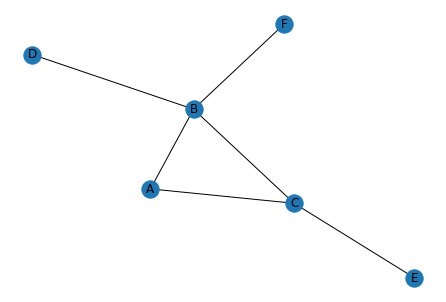

In [51]:
# FACEBOOK
# Importer le package necessaire
import matplotlib.pyplot as plt
import networkx as nx

# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['A', 'B','C' , 'D', 'E', 'F']
G.add_nodes_from(list_nodes)

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('A', 'C')
G.add_edge('C', 'E')
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('B', 'F')
G.add_edge('C', 'B')

# Montrer le graphe
nx.draw(G,with_labels = True)
plt.show()

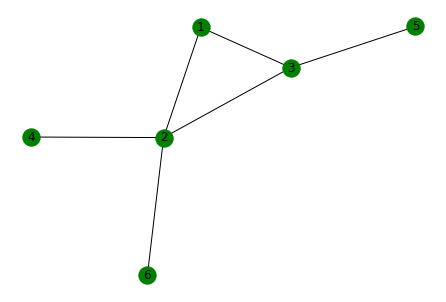

In [8]:
# WHATSAPP
# Importer le package necessaire
import matplotlib.pyplot as plt
import networkx as nx

# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['1','2','3' , '4', '5', '6']
G.add_nodes_from(list_nodes)

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('1', '3')
G.add_edge('3', '5')
G.add_edge('1', '2')
G.add_edge('2', '4')
G.add_edge('2', '6')
G.add_edge('3', '2')

# Montrer le graphe
nx.draw(G,with_labels = True, node_color='g' )
plt.show()